In [1]:
pip install selenium pandas

Active code page: 65001
Active code page: 1256
Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np

BASE_URL = "https://palestine.io/ar/property-new"

def get_max_page():
    driver.get(BASE_URL)
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "li.page-item a.page-link")))
    links = driver.find_elements(By.CSS_SELECTOR, "li.page-item:not(.next):not(.prev) a.page-link")
    nums = [int(link.text) for link in links if link.text.isdigit()]
    return max(nums) if nums else 1

def get_links_on_page(page):
    driver.get(f"{BASE_URL}?page={page}")
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "a.view.btn-pro")))
    return [a.get_attribute("href") for a in driver.find_elements(By.CSS_SELECTOR, "a.view.btn-pro")]

def extract_data(url):
    driver.get(url)
    wait.until(EC.presence_of_element_located((By.ID, "created_at")))

    def get_by_id(id_):
      try:
        return driver.find_element(By.ID, id_).text.strip()
      except:
        return np.nan

    def try_click(trigger):
        try:
            btn = driver.find_element(By.CSS_SELECTOR, f"span.trigger[data-trigger-label='{trigger}']")
            btn.click()
            wait.until(EC.visibility_of_element_located((By.ID, trigger)))
            return driver.find_element(By.ID, trigger).text.strip()
        except:
            return np.nan

    # فصل تاريخ النشر عن الملاحظة
    raw_date_note = get_by_id("created_at")
    if '\n' in raw_date_note:
        date_part, note_part = raw_date_note.split('\n', 1)
    else:
        date_part, note_part = raw_date_note, ""

    services = get_by_id("services")
    services = " / ".join([s.strip() for s in services.split("/") if s.strip()]) if services != "غير متوفر" else services

    return {
        'تاريخ النشر': date_part.strip(),
        'ملاحظة الإعلان': note_part.strip(),
        'العرض': get_by_id("offer"),
        'نوع العقار': get_by_id("property_type"),
        'المساحة': get_by_id("space"),
        'المدينة': get_by_id("city"),
        'المنطقة': get_by_id("location"),
        'تصنيف المنطقة': get_by_id("area_type"),
        'العنوان': get_by_id("address"),
        'تفاصيل': get_by_id("description"),
        'الخدمات والمميزات': services,
        'السعر التقريبي': try_click("rate"),
        'اسم المعلن': get_by_id("name"),
        'هاتف المعلن': try_click("phone")
    }

def main():
    max_page = get_max_page()
    print(f"🔢 عدد الصفحات: {max_page}")

    all_links = []
    for p in range(1, max_page + 1):
        links = get_links_on_page(p)
        print(f"🧷 صفحة {p}: {len(links)} إعلان")
        all_links += links

    print(f"🎯 المجموع: {len(all_links)} إعلان")

    data = []
    for i, link in enumerate(all_links, 1):
        print(f"⏳ {i}/{len(all_links)}", end="\r")
        data.append(extract_data(link))

    df = pd.DataFrame(data)
    df.to_csv("Palestine_real_estate_scraping_output.csv", index=False, encoding="utf-8-sig")
    print("\n✅ تم حفظ الملف: Palestine_real_estate_scraping_output.csv")
    return df

if __name__ == "__main__":
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--disable-gpu')
    chrome_options.add_argument('--disable-extensions')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--blink-settings=imagesEnabled=false')

    driver = webdriver.Chrome(options=chrome_options)
    wait = WebDriverWait(driver, 7)

    try:
        df = main()
        print(df.head())
    finally:
        driver.quit()


🔢 عدد الصفحات: 43
🧷 صفحة 1: 10 إعلان
🧷 صفحة 2: 10 إعلان
🧷 صفحة 3: 10 إعلان
🧷 صفحة 4: 10 إعلان
🧷 صفحة 5: 10 إعلان
🧷 صفحة 6: 10 إعلان
🧷 صفحة 7: 10 إعلان
🧷 صفحة 8: 10 إعلان
🧷 صفحة 9: 10 إعلان
🧷 صفحة 10: 10 إعلان
🧷 صفحة 11: 10 إعلان
🧷 صفحة 12: 10 إعلان
🧷 صفحة 13: 10 إعلان
🧷 صفحة 14: 10 إعلان
🧷 صفحة 15: 10 إعلان
🧷 صفحة 16: 10 إعلان
🧷 صفحة 17: 10 إعلان
🧷 صفحة 18: 10 إعلان
🧷 صفحة 19: 10 إعلان
🧷 صفحة 20: 10 إعلان
🧷 صفحة 21: 10 إعلان
🧷 صفحة 22: 10 إعلان
🧷 صفحة 23: 10 إعلان
🧷 صفحة 24: 10 إعلان
🧷 صفحة 25: 10 إعلان
🧷 صفحة 26: 10 إعلان
🧷 صفحة 27: 10 إعلان
🧷 صفحة 28: 10 إعلان
🧷 صفحة 29: 10 إعلان
🧷 صفحة 30: 10 إعلان
🧷 صفحة 31: 10 إعلان
🧷 صفحة 32: 10 إعلان
🧷 صفحة 33: 10 إعلان
🧷 صفحة 34: 10 إعلان
🧷 صفحة 35: 10 إعلان
🧷 صفحة 36: 10 إعلان
🧷 صفحة 37: 10 إعلان
🧷 صفحة 38: 10 إعلان
🧷 صفحة 39: 10 إعلان
🧷 صفحة 40: 10 إعلان
🧷 صفحة 41: 10 إعلان
🧷 صفحة 42: 10 إعلان
🧷 صفحة 43: 5 إعلان
🎯 المجموع: 425 إعلان
⏳ 425/425
✅ تم حفظ الملف: Palestine_real_estate_scraping_output.csv
  تاريخ النشر ملاحظة الإعلان    العرض نوع ا

In [3]:
 df

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن
0,30/12/2025,,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978
1,31/01/2026,,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656
2,04/01/2026,,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495
3,01/01/2026,,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342
4,15/12/2025,,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طولكرم مجمع المحاكم الجديد شارع الديشه,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,ليندا سودي,0569150444
421,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,هل تبحث عن فيلا في محافظة رام الله والبيرة؟ لل...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,Lafi amleh,0594321123
422,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,mohammad kmail,0597209306
423,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,للبيع شقة ١٥٦ متر مربع في مدينة رام الله اخر ش...,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,محمد عبد الحفيظ,0597651181


In [4]:
from google.colab import files
files.download("Palestine_real_estate_scraping_output.csv")

ModuleNotFoundError: No module named 'google.colab'

In [5]:
import pandas as pd
import re


myData = pd.read_csv("Palestine_real_estate_scraping_output.csv")
myData.head()

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495
3,01/01/2026,NaN,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,NaN,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572


In [6]:
myData.shape

(425, 14)

In [7]:
# معلومات عامة
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   تاريخ النشر        425 non-null    object
 1   ملاحظة الإعلان     388 non-null    object
 2   العرض              425 non-null    object
 3   نوع العقار         425 non-null    object
 4   المساحة            425 non-null    object
 5   المدينة            425 non-null    object
 6   المنطقة            425 non-null    object
 7   تصنيف المنطقة      335 non-null    object
 8   العنوان            417 non-null    object
 9   تفاصيل             422 non-null    object
 10  الخدمات والمميزات  392 non-null    object
 11  السعر التقريبي     425 non-null    object
 12  اسم المعلن         425 non-null    object
 13  هاتف المعلن        424 non-null    object
dtypes: object(14)
memory usage: 46.6+ KB


In [8]:
# ملخص إحصائي
print(myData.describe(include='all'))

       تاريخ النشر                                     ملاحظة الإعلان  العرض  \
count          425                                                388    425   
unique         257                                                  1      3   
top     27/01/2023  هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...  للبيع   
freq            11                                                388    383   

       نوع العقار       المساحة           المدينة         المنطقة  \
count         425           425               425             425   
unique          9           217                12              99   
top      قطعة ارض  500 متر مربع  رام الله والبيرة  مدينة رام الله   
freq          178            15               153              60   

       تصنيف المنطقة                     العنوان  \
count            335                         417   
unique             3                         380   
top                أ  الطيرة، خلف مدارس المستقبل   
freq             265                         

In [9]:
myData.replace("غير متوفر", pd.NA, inplace=True)

In [10]:
print(myData.isnull().sum())

تاريخ النشر           0
ملاحظة الإعلان       37
العرض                 0
نوع العقار            0
المساحة               0
المدينة               0
المنطقة               0
تصنيف المنطقة        90
العنوان               8
تفاصيل                3
الخدمات والمميزات    33
السعر التقريبي        0
اسم المعلن            0
هاتف المعلن           1
dtype: int64


حذف عمود ملاحظة الاعلان و عمود التفاصيل واسم المعلن و هاتف المعلن

In [11]:
myData = myData.drop(columns=["ملاحظة الإعلان", "تفاصيل","اسم المعلن","هاتف المعلن"])
myData.head()

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار
3,01/01/2026,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,NaN,80 الف الى 90 الف دينار / متر مربع


In [12]:
import numpy as np
import re


def clean_text(text):
    tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = tashkeel.sub('', text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

def word_to_number(text):
    text = clean_text(text)
    pattern = re.compile(r'(\d+)\s*(الاف|ألف|آلاف|1000)')
    text = pattern.sub(lambda m: str(int(m.group(1)) * 1000), text)
    text = re.sub(r'(\d+)\s*ملايين?', lambda m: str(int(m.group(1)) * 1_000_000), text)
    text = re.sub(r'\bالف\b', '1000', text)
    text = text.replace("ألف", "1000")
    text = text.replace("الاف", "1000")
    text = text.replace("مليون", "1000000")
    text = text.replace("ملايين", "1000000")
    def merge_numbers(match):
        first_num = int(match.group(1))
        second_num = int(match.group(2))
        if second_num == 1000:
            return str(first_num * 1000)
        else:
            return f"{first_num} {second_num}"
    text = re.sub(r'(\d+)\s+(\d+)', merge_numbers, text)
    return text

def convert_price_to_usd(price_text):
    if pd.isna(price_text):
        return np.nan
    price_text_clean = word_to_number(str(price_text))
    exchange_rates = {
        "شيكل": 0.27,
        "₪": 0.27,
        "دينار": 1.41,
        "jd": 1.41,
        "دولار": 1.0,
        "$": 1.0
    }
    numbers = re.findall(r'\d+', price_text_clean)
    numbers = [int(n) for n in numbers]
    if not numbers:
        return np.nan
    avg_price = sum(numbers[:2]) / min(len(numbers), 2)
    price_text_lower = price_text_clean.lower()
    for currency, rate in exchange_rates.items():
        if re.search(currency, price_text_lower):
            return round(avg_price * rate, 3)
    return round(avg_price, 3)

myData['السعر_بالدولار'] = myData['السعر التقريبي'].apply(convert_price_to_usd)


In [13]:
# اختبار
text = "60 الف الى 70 الف دينار / لكامل العقار"
usd_price = convert_price_to_usd(text)
print(f"السعر بالدولار = {usd_price}")


السعر بالدولار = 91650.0


In [14]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0
3,01/01/2026,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,850000.0
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,NaN,80 الف الى 90 الف دينار / متر مربع,119850.0
...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0


In [15]:
# مثال: ملء القيم الرقمية المتوسطة
myData["السعر_بالدولار"] = pd.to_numeric(myData["السعر_بالدولار"], errors="coerce")
myData["السعر_بالدولار"].fillna(myData["السعر_بالدولار"].median(), inplace=True)

# ملء النصوص بقيمة شائعة
myData["المنطقة"].fillna("غير محدد", inplace=True)

In [16]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0
3,01/01/2026,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,850000.0
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,NaN,80 الف الى 90 الف دينار / متر مربع,119850.0
...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData["location_encoded"] = le.fit_transform(myData["المدينة"])


In [18]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,location_encoded
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,2
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,3
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,5
3,01/01/2026,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,850000.0,3
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,NaN,80 الف الى 90 الف دينار / متر مربع,119850.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0,8
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0,5
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0,4
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0,5


3. توحيد الخصائص الرقمية (Normalization / Standardization)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
myData["price_scaled"] = scaler.fit_transform(myData[["السعر_بالدولار"]])

In [20]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,location_encoded,price_scaled
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,2,-0.777466
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,3,-0.097533
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,5,0.064661
3,01/01/2026,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,850000.0,3,4.048371
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,NaN,80 الف الى 90 الف دينار / متر مربع,119850.0,11,-0.106923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0,8,-0.347653
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0,5,0.633763
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0,4,-0.427896
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0,5,-0.251190


 4. معالجة القيم المتطرفة (Outliers)

In [21]:
Q1 = myData["السعر_بالدولار"].quantile(0.25)
Q3 = myData["السعر_بالدولار"].quantile(0.75)
IQR = Q3 - Q1

# تحديد القيم المتطرفة
outliers = myData[(myData["السعر_بالدولار"] < (Q1 - 1.5 * IQR)) | (myData["السعر_بالدولار"] > (Q3 + 1.5 * IQR))]

# إزالة القيم المتطرفة إن لزم الأمر
myData = myData[~myData.index.isin(outliers.index)]


In [22]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,location_encoded,price_scaled
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,2,-0.777466
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,3,-0.097533
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,5,0.064661
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,NaN,80 الف الى 90 الف دينار / متر مربع,119850.0,11,-0.106923
5,26/11/2025,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,94500.0,8,-0.251190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0,8,-0.347653
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0,5,0.633763
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0,4,-0.427896
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0,5,-0.251190


📝 معلومات عامة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   تاريخ النشر        425 non-null    object
 1   ملاحظة الإعلان     388 non-null    object
 2   العرض              425 non-null    object
 3   نوع العقار         425 non-null    object
 4   المساحة            425 non-null    object
 5   المدينة            425 non-null    object
 6   المنطقة            425 non-null    object
 7   تصنيف المنطقة      335 non-null    object
 8   العنوان            417 non-null    object
 9   تفاصيل             422 non-null    object
 10  الخدمات والمميزات  392 non-null    object
 11  السعر التقريبي     425 non-null    object
 12  اسم المعلن         425 non-null    object
 13  هاتف المعلن        424 non-null    object
dtypes: object(14)
memory usage: 46.6+ KB
None

🔍 عدد القيم الفارغة:
تاريخ النشر           0
ملاحظة الإعلان       37
العرض     

c:\Users\JIT\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\JIT\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\JIT\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count



📁 تم حفظ الملف المعالج باسم: real_estate_preprocessed.csv


c:\Users\JIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

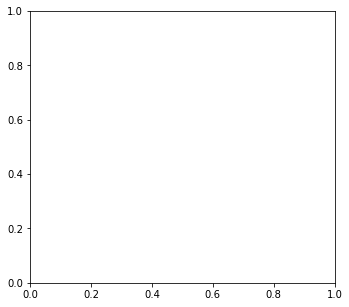

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. قراءة البيانات
df = pd.read_csv("Palestine_real_estate_scraping_output.csv")

# 2. عرض معلومات مبدئية
print("📝 معلومات عامة:")
print(df.info())

print("\n🔍 عدد القيم الفارغة:")
print(df.isnull().sum())

# تحويل العمود price إلى رقم إن لم يكن رقميًا
df["price"] = pd.to_numeric(df["السعر التقريبي"], errors="coerce")

# 3. معالجة القيم الفارغة
# تعبئة price بالوسيط
df["price"].fillna(df["price"].median(), inplace=True)

# تعبئة location والخدمات location/services
df["المنطقة"].fillna("غير محدد", inplace=True)
df["الخدمات والمميزات"].fillna("غير محدد", inplace=True)

# 4. ترميز الأعمدة النصية
label_encoders = {}
for col in ["المنطقة", "الخدمات والمميزات"]:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. توحيد القيم العددية (Standardization)
scaler = StandardScaler()
df["price_scaled"] = scaler.fit_transform(df[["price"]])

# 6. كشف القيم المتطرفة في السعر (IQR method)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# تحديد القيم المتطرفة
outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
print(f"\n📌 عدد القيم المتطرفة المكتشفة: {len(outliers)}")

# إزالة القيم المتطرفة (اختياري)
df_cleaned = df[~df.index.isin(outliers.index)]

# 7. عرض عينة من البيانات المعالجة
print("\n✅ عينة من البيانات بعد المعالجة:")
print(df_cleaned[["price", "price_scaled", "المنطقة", "المنطقة_encoded", "الخدمات والمميزات", "الخدمات والمميزات_encoded"]].head())

# 8. حفظ البيانات النهائية إلى ملف CSV جديد
df_cleaned.to_csv("real_estate_preprocessed.csv", index=False)
print("\n📁 تم حفظ الملف المعالج باسم: real_estate_preprocessed.csv")

# 9. رسم السعر قبل وبعد المعالجة
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df["السعر التقريبي"])
plt.title("قبل معالجة القيم المتطرفة")

plt.subplot(1, 2, 2)
sns.boxplot(df_cleaned["السعر التقريبي"])
plt.title("بعد إزالة القيم المتطرفة")

plt.tight_layout()
plt.show()

In [24]:
df

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,price,المنطقة_encoded,الخدمات والمميزات_encoded,price_scaled
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,NaN,60,140,NaN
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,NaN,23,117,NaN
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,NaN,86,104,NaN
3,01/01/2026,NaN,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342,NaN,23,246,NaN
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,NaN,96,43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طولكرم مجمع المحاكم الجديد شارع الديشه,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,ليندا سودي,0569150444,NaN,94,39,NaN
421,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,هل تبحث عن فيلا في محافظة رام الله والبيرة؟ لل...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,Lafi amleh,0594321123,NaN,69,122,NaN
422,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,mohammad kmail,0597209306,NaN,71,217,NaN
423,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,للبيع شقة ١٥٦ متر مربع في مدينة رام الله اخر ش...,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,محمد عبد الحفيظ,0597651181,NaN,86,6,NaN



📌 عدد القيم المتطرفة المكتشفة: 57

✅ عينة من البيانات المعالجة:
   price  price_scaled       المنطقة  المنطقة_encoded  \
0    7.5     -0.971579         شعفاط               60   
1  450.0     -0.315326      بيت جالا               23   
2  555.0     -0.159605  مدينة البيرة               86   
4  442.0     -0.327190   مدينة نابلس               96   
5  350.0     -0.463632  مدينة طولكرم               94   

                                   الخدمات والمميزات  \
0  ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...   
1  ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...   
2  ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...   
4                                           غير محدد   
5  ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...   

   الخدمات والمميزات_encoded  
0                        140  
1                        117  
2                        104  
4                         43  
5                        161  

📁 تم حفظ البيانات المعالجة في: real_estate_preprocessed.csv


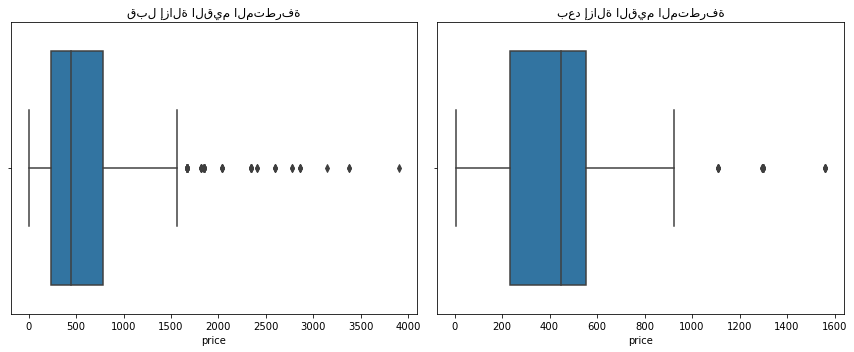

In [25]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. قراءة البيانات
df = pd.read_csv("Palestine_real_estate_scraping_output.csv")

# 2. تعريف دالة استخراج السعر المتوسط
def extract_average_price(text):
    if pd.isna(text):
        return np.nan

    text = text.lower()
    numbers = re.findall(r'\d+', text)
    numbers = list(map(int, numbers))

    if len(numbers) >= 2:
        avg = sum(numbers[:2]) / 2
    elif len(numbers) == 1:
        avg = numbers[0]
    else:
        return np.nan

    # تحويل العملة إن وُجدت
    if "دولار" in text:
        avg *= 3.7  # تحويل تقديري للدولار إلى شيكل
    elif "دينار" in text:
        avg *= 5.2  # تحويل تقديري للدينار إلى شيكل

    return avg

# 3. تطبيق الدالة على عمود السعر النصي
df["price"] = df["السعر التقريبي"].apply(extract_average_price)

# 4. معالجة القيم الفارغة
df["price"].fillna(df["price"].median(), inplace=True)
df["المنطقة"].fillna("غير محدد", inplace=True)
df["الخدمات والمميزات"].fillna("غير محدد", inplace=True)

# 5. ترميز الأعمدة النصية
label_encoders = {}
for col in ["المنطقة", "الخدمات والمميزات"]:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le

# 6. توحيد القيم الرقمية
scaler = StandardScaler()
df["price_scaled"] = scaler.fit_transform(df[["price"]])

# 7. كشف القيم المتطرفة في السعر (IQR method)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
print(f"\n📌 عدد القيم المتطرفة المكتشفة: {len(outliers)}")

# 8. إزالة القيم المتطرفة (اختياري)
df_cleaned = df[~df.index.isin(outliers.index)]

# 9. عرض عينة من البيانات بعد المعالجة
print("\n✅ عينة من البيانات المعالجة:")
print(df_cleaned[["price", "price_scaled", "المنطقة", "المنطقة_encoded", "الخدمات والمميزات", "الخدمات والمميزات_encoded"]].head())

# 10. حفظ الملف النهائي
df_cleaned.to_csv("real_estate_preprocessed.csv", index=False)
print("\n📁 تم حفظ البيانات المعالجة في: real_estate_preprocessed.csv")

# 11. رسم السعر قبل وبعد المعالجة
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["price"])
plt.title("قبل إزالة القيم المتطرفة")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned["price"])
plt.title("بعد إزالة القيم المتطرفة")

plt.tight_layout()
plt.show()


In [26]:
df

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,price,المنطقة_encoded,الخدمات والمميزات_encoded,price_scaled
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,7.5,60,140,-0.971579
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,450.0,23,117,-0.315326
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,555.0,86,104,-0.159605
3,01/01/2026,NaN,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342,3145.0,23,246,3.681516
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,442.0,96,43,-0.327190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طولكرم مجمع المحاكم الجديد شارع الديشه,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,ليندا سودي,0569150444,286.0,94,39,-0.558547
421,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,هل تبحث عن فيلا في محافظة رام الله والبيرة؟ لل...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,Lafi amleh,0594321123,925.0,69,122,0.389127
422,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,mohammad kmail,0597209306,234.0,71,217,-0.635666
423,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,للبيع شقة ١٥٦ متر مربع في مدينة رام الله اخر ش...,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,محمد عبد الحفيظ,0597651181,350.0,86,6,-0.463632


# Step 2

###

In [27]:
column_name = "السعر التقريبي"

# استخراج الحدين الأدنى والأقصى
myData[["السعر_الحد_الادنى", "السعر_الحد_الأقصى"]] = myData[column_name].apply(
    lambda x: pd.Series(extract_price_range_usd(x))
)

# # إنشاء عمود نطاق السعر
# df["نطاق_السعر"] = df.apply(
#     lambda row: f"{int(row['السعر_الحد_الادنى'])} - {int(row['السعر_الحد_الأقصى'])}"
#     if not pd.isna(row["السعر_الحد_الادنى"]) and not pd.isna(row["السعر_الحد_الأقصى"])
#     else None, axis=1
# )

# إنشاء عمود المتوسط الحسابي
myData["متوسط_السعر_بالدولار"] = myData[["السعر_الحد_الادنى", "السعر_الحد_الأقصى"]].mean(axis=1)

NameError: name 'extract_price_range_usd' is not defined

# 2. Data Preprocessing

تعويض القيم المفقودة

✅ 1. Handle Missing Data – معالجة القيم المفقودة:
✅ عرض عدد القيم المفقودة لكل عمود (isnull().sum()).

✅ تعويض القيم الرقمية المفقودة في السعر_بالدولار بـ المتوسط.

✅ تعويض القيم النصية المفقودة في الخدمات والمميزات بـ "غير محدد".

In [28]:
missing_summary = myData.isnull().sum()
print(missing_summary[missing_summary > 0])

تصنيف المنطقة        77
العنوان               8
الخدمات والمميزات    25
dtype: int64


In [29]:
# تعويض القيم المفقودة بالمتوسط
myData['السعر_بالدولار'].fillna(myData['السعر_بالدولار'].mean(), inplace=True)


C:\Users\JIT\AppData\Local\Temp\ipykernel_22288\301547644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['السعر_بالدولار'].fillna(myData['السعر_بالدولار'].mean(), inplace=True)


In [30]:
# تعويض بنص ثابت
myData['الخدمات والمميزات'].fillna("غير محدد", inplace=True)

C:\Users\JIT\AppData\Local\Temp\ipykernel_22288\88830587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['الخدمات والمميزات'].fillna("غير محدد", inplace=True)


In [31]:
print("عدد القيم المفقودة بعد المعالجة:")
print(myData.isnull().sum())


عدد القيم المفقودة بعد المعالجة:
تاريخ النشر           0
العرض                 0
نوع العقار            0
المساحة               0
المدينة               0
المنطقة               0
تصنيف المنطقة        77
العنوان               8
الخدمات والمميزات     0
السعر التقريبي        0
السعر_بالدولار        0
location_encoded      0
price_scaled          0
dtype: int64


# التعامل مع القيم الشاذة (Outliers)؟



### لاكتشاف وإزالة Outliers من عمود السعر_بالدولار

##### حذف أي عقار سعره خارج المجال المقبول.

يعطيك رسم توضيحي يبين الفرق قبل وبعد المعالجة.

يتم حفظ البيانات المنقحة في myData بعد إزالة الشواذ.

✅ 3. Outlier Treatment – معالجة القيم الشاذة:
✅ استخدام طريقة IQR (Interquartile Range) لاكتشاف القيم الشاذة في عمود السعر_بالدولار.

✅ إزالة الصفوف التي تقع خارج النطاق المقبول (Q1 - 1.5×IQR إلى Q3 + 1.5×IQR).

✅ عرض عدد الصفوف المحذوفة ورسم توضيحي (Boxplot).

عدد العقارات قبل الفلترة: 383
عدد العقارات بعد الفلترة: 383
عدد القيم الشاذة التي تم حذفها: 0


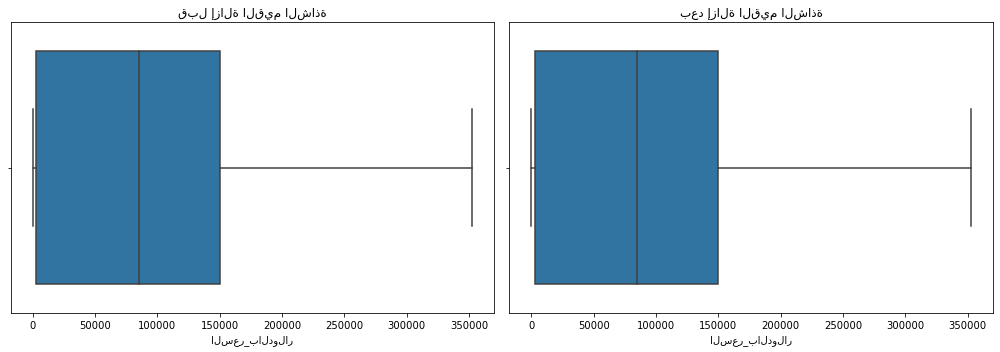

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب IQR
Q1 = myData['السعر_بالدولار'].quantile(0.25)
Q3 = myData['السعر_بالدولار'].quantile(0.75)
IQR = Q3 - Q1

# تحديد الحد الأدنى والأقصى المقبول
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# فلترة البيانات للتخلص من القيم الشاذة
filtered_data = myData[(myData['السعر_بالدولار'] >= lower_bound) & (myData['السعر_بالدولار'] <= upper_bound)]

print(f"عدد العقارات قبل الفلترة: {len(myData)}")
print(f"عدد العقارات بعد الفلترة: {len(filtered_data)}")
print(f"عدد القيم الشاذة التي تم حذفها: {len(myData) - len(filtered_data)}")

# رسم بياني قبل وبعد
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=myData['السعر_بالدولار'])
plt.title("قبل إزالة القيم الشاذة")

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_data['السعر_بالدولار'])
plt.title("بعد إزالة القيم الشاذة")

plt.tight_layout()
plt.show()

# تحديث البيانات الرئيسية
myData = filtered_data.copy()


# إعادة ضبط القيم العددية (Normalization أو Standardization)؟

✅ 2. Feature Rescaling – إعادة ضبط القيم العددية:
✅ تم استخدام Standardization (Z-score) عبر StandardScaler من scikit-learn على عمود السعر_بالدولار.

✅ حفظ النتيجة في عمود جديد: السعر_بالدولار_مقياسي.

In [33]:
# تطبيق Standardization على عمود السعر_بالدولار

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# تطبيق المقياس على العمود وتحويله إلى عمود جديد
myData['السعر_بالدولار_مقياسي'] = scaler.fit_transform(myData[['السعر_بالدولار']])

# عرض بعض النتائج
print(myData[['السعر_بالدولار', 'السعر_بالدولار_مقياسي']].head())


   السعر_بالدولار  السعر_بالدولار_مقياسي
0          2025.0              -1.041963
1        121500.0               0.382865
2        150000.0               0.722749
4        119850.0               0.363187
5         94500.0               0.060870


In [34]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,location_encoded,price_scaled,السعر_بالدولار_مقياسي
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,2,-0.777466,-1.041963
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,3,-0.097533,0.382865
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,5,0.064661,0.722749
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,غير محدد,80 الف الى 90 الف دينار / متر مربع,119850.0,11,-0.106923,0.363187
5,26/11/2025,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,94500.0,8,-0.251190,0.060870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0,8,-0.347653,-0.141272
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0,5,0.633763,1.915323
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0,4,-0.427896,-0.309425
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0,5,-0.251190,0.060870


In [35]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
myData['السعر_بالدولار_منظم'] = normalizer.fit_transform(myData[['السعر_بالدولار']])


In [36]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,location_encoded,price_scaled,السعر_بالدولار_مقياسي,السعر_بالدولار_منظم
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,2,-0.777466,-1.041963,0.005738
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,3,-0.097533,0.382865,0.344676
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,5,0.064661,0.722749,0.425528
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,غير محدد,80 الف الى 90 الف دينار / متر مربع,119850.0,11,-0.106923,0.363187,0.339995
5,26/11/2025,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,94500.0,8,-0.251190,0.060870,0.268080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0,8,-0.347653,-0.141272,0.219994
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0,5,0.633763,1.915323,0.709218
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0,4,-0.427896,-0.309425,0.179994
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0,5,-0.251190,0.060870,0.268080


✅ 4. Categorical Encoding – ترميز الأعمدة النصية:
✅ نوع العقار: تم ترميزه بـ Label Encoding في عمود جديد نوع_العقار_encoded.

✅ المدينة: تم ترميزها بـ One-Hot Encoding باستخدام pd.get_dummies().

✅ الخدمات والمميزات: تم تفصيله إلى قائمة ثم ترميزها باستخدام MultiLabelBinarizer وإضافة الأعمدة الناتجة.

Label Encoding (لعمود بسيط مثل نوع العقار

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData['نوع_العقار_encoded'] = le.fit_transform(myData['نوع العقار'].astype(str))

# عرض النتائج
print(myData[['نوع العقار', 'نوع_العقار_encoded']].drop_duplicates())


   نوع العقار  نوع_العقار_encoded
0         شقة                   2
2         محل                   5
4    قطعة ارض                   4
7   بيت مستقل                   0
32       فيلا                   3
33       مخزن                   6
45       رووف                   1
50       مكتب                   7


In [38]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,location_encoded,price_scaled,السعر_بالدولار_مقياسي,السعر_بالدولار_منظم,نوع_العقار_encoded
0,30/12/2025,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,2,-0.777466,-1.041963,0.005738,2
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,3,-0.097533,0.382865,0.344676,2
2,04/01/2026,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,5,0.064661,0.722749,0.425528,5
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,غير محدد,80 الف الى 90 الف دينار / متر مربع,119850.0,11,-0.106923,0.363187,0.339995,4
5,26/11/2025,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,94500.0,8,-0.251190,0.060870,0.268080,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0,8,-0.347653,-0.141272,0.219994,2
421,27/01/2021,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0,5,0.633763,1.915323,0.709218,3
422,26/01/2021,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0,4,-0.427896,-0.309425,0.179994,4
423,26/01/2021,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0,5,-0.251190,0.060870,0.268080,2


In [39]:
# ✅ One-Hot Encoding (لعمود مثل المدينة):
myData = pd.get_dummies(myData, columns=['المدينة'], prefix='مدينة', drop_first=True)


In [40]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,...,مدينة_القدس,مدينة_بيت لحم,مدينة_جنين,مدينة_رام الله والبيرة,مدينة_سلفيت,مدينة_طوباس,مدينة_طولكرم,مدينة_قطاع غزة,مدينة_قلقيلية,مدينة_نابلس
0,30/12/2025,للايجار,شقة,120 متر مربع,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,...,1,0,0,0,0,0,0,0,0,0
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,...,0,1,0,0,0,0,0,0,0,0
2,04/01/2026,للبيع,محل,45 متر مربع,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,...,0,0,0,1,0,0,0,0,0,0
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,مدينة نابلس,أ,نابلس الجديدة,غير محدد,80 الف الى 90 الف دينار / متر مربع,119850.0,...,0,0,0,0,0,0,0,0,0,1
5,26/11/2025,للبيع,شقة,150 متر مربع,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,94500.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,للبيع,شقة,168 متر مربع,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,77550.0,...,0,0,0,0,0,0,1,0,0,0
421,27/01/2021,للبيع,فيلا,300 متر مربع,عين سينا,ب,شارع رام الله نابلس,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,250000.0,...,0,0,0,1,0,0,0,0,0,0
422,26/01/2021,للبيع,قطعة ارض,4 دونم,قباطية,أ,شارع الجامعه الامريكيه,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,63450.0,...,0,0,1,0,0,0,0,0,0,0
423,26/01/2021,للبيع,شقة,156 متر مربع,مدينة البيرة,أ,اخر شارع الارسال سردا,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,94500.0,...,0,0,0,1,0,0,0,0,0,0


### ترميز خاص لعمود الخدمات والمميزات

In [41]:
# لأنه يحتوي على قائمة من الميزات (مثلاً: "مصعد، كراج، حديقة") — نستخدم Multi-Label Binarizer:
from sklearn.preprocessing import MultiLabelBinarizer

# تأكد من تحويل النص إلى قائمة
myData['الخدمات_list'] = myData['الخدمات والمميزات'].apply(lambda x: str(x).split(',') if pd.notnull(x) else [])

mlb = MultiLabelBinarizer()
features_encoded = pd.DataFrame(mlb.fit_transform(myData['الخدمات_list']), columns=mlb.classes_)

# دمج النتائج مع البيانات الأصلية
myData = pd.concat([myData, features_encoded], axis=1)

# حذف العمود النصي الأصلي إن رغبت
# myData.drop(columns=['الخدمات والمميزات', 'الخدمات_list'], inplace=True)



In [42]:
myData

,تاريخ النشر,العرض,نوع العقار,المساحة,المنطقة,تصنيف المنطقة,العنوان,الخدمات والمميزات,السعر التقريبي,السعر_بالدولار,...,ماء / كهرباء / موقف للسيارة,ماء / كهرباء / موقف للسيارة / أشجار مثمرة / حديقة / بستان,ماء / كهرباء / موقف للسيارة / حديقة / بستان / عظم,ماء / كهرباء / موقف للسيارة / سور / غير مفروشة,مصعد / إمكانية التقسيط / بلكونة / غير مفروشة,مصعد / موقف للسيارة / إمكانية التقسيط / عظم,مصعد / موقف للسيارة / سدة (عليّة),مصعد / موقف للسيارة / غير مفروشة,موقف للسيارة / إمكانية التقسيط,موقف للسيارة / حديقة / بستان / مفروشة
0,30/12/2025,للايجار,شقة,120 متر مربع,شعفاط,أ,شعفاط,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,2025.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31/01/2026,للبيع,شقة,153 متر مربع,بيت جالا,أ,بيت جالا - حارة الجورية,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,121500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,04/01/2026,للبيع,محل,45 متر مربع,مدينة البيرة,أ,محل تجاري للبيع بالخلو,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15/12/2025,للبيع,قطعة ارض,560 متر مربع,مدينة نابلس,أ,نابلس الجديدة,غير محدد,80 الف الى 90 الف دينار / متر مربع,119850.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,26/11/2025,للبيع,شقة,150 متر مربع,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,94500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Model Training & Comparison

مشكلة انحدار Regression
تدريب 3 نماذج انحدار للتنبؤ بسعر العقار بالدولار، ومقارنتها باستخدام:

MSE (متوسط مربع الخطأ)

MAE (متوسط الخطأ المطلق)

R² Score (معامل التحديد)

In [43]:
from sklearn.model_selection import train_test_split

# حذف الأعمدة التي لا نريد استخدامها
features = myData.drop(columns=['السعر_بالدولار', 'السعر_بالدولار_مقياسي'])  # نستخدم النسخة الأصلية للسعر
target = myData['السعر_بالدولار']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Random Forest Regressor



In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


ValueError: could not convert string to float: '29/01/2023'

In [45]:
# عرض أنواع البيانات
print(myData.dtypes[myData.dtypes == "object"])


تاريخ النشر          object
العرض                object
نوع العقار           object
المساحة              object
المنطقة              object
تصنيف المنطقة        object
العنوان              object
الخدمات والمميزات    object
السعر التقريبي       object
الخدمات_list         object
dtype: object


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from datetime import datetime

# 1️⃣ تحويل التاريخ إلى عدد الأيام منذ النشر
def convert_date_to_days(date_str):
    try:
        post_date = pd.to_datetime(date_str, dayfirst=True, errors='coerce')
        if pd.isnull(post_date):
            return np.nan
        return (datetime.today() - post_date).days
    except:
        return np.nan

myData['ايام_من_النشر'] = myData['تاريخ النشر'].apply(convert_date_to_days)

# 2️⃣ تحويل المساحة إلى رقم
def extract_area(text):
    try:
        return float(str(text).split()[0].replace(',', '').replace('متر', '').strip())
    except:
        return np.nan

myData['المساحة_رقم'] = myData['المساحة'].apply(extract_area)

# 3️⃣ Label Encoding للأعمدة الفئوية البسيطة
label_cols = ['العرض', 'نوع العقار', 'تصنيف المنطقة', 'المنطقة']
le = LabelEncoder()
for col in label_cols:
    myData[col + '_encoded'] = le.fit_transform(myData[col].astype(str))

# 4️⃣ ترميز الخدمات باستخدام MultiLabelBinarizer
mlb = MultiLabelBinarizer()
services_encoded = pd.DataFrame(mlb.fit_transform(myData['الخدمات_list']), columns=mlb.classes_)
myData = pd.concat([myData, services_encoded], axis=1)

# 5️⃣ التأكد أن الأعمدة مثل مدينة_XXX هي أرقام 0/1
city_cols = [col for col in myData.columns if col.startswith('مدينة_')]
for col in city_cols:
    myData[col] = myData[col].astype(int)

# 6️⃣ حذف الأعمدة النصية الأصلية التي لم تعد ضرورية
myData.drop(columns=[
    'تاريخ النشر', 'العنوان', 'الخدمات والمميزات', 'الخدمات_list', 'المساحة'
] + label_cols, inplace=True)


TypeError: 'float' object is not iterable

In [47]:
import pandas as pd
import re


df = pd.read_csv("Palestine_real_estate_scraping_output.csv")
df.head(20)

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495
3,01/01/2026,NaN,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,NaN,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572
5,26/11/2025,NaN,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,شقة للبيع ، مساحتها ١٥٠ م٢ ، تتكون من ٤ غرف وص...,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,مراد غالب محمود ياسين,0568996646
6,21/11/2025,NaN,للبيع,قطعة ارض,685 متر مربع,جنين,جبع,أ,جبع,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,NaN,40 - 50 دينار / متر مربع,يحيى سعد الدين,+972599231525
7,26/10/2025,NaN,للبيع,بيت مستقل,180 متر مربع,نابلس,الباذان,أ,قرب صالة الاوبرا,بيت مستقل موقع هادئ مسور من ثلاث جهات يوجد موق...,ماء / كهرباء / انترنت / طابو / شارع فرعي / موق...,90 الف الى 100 الف دينار / لكامل العقار,عدنان شاكر احمد,+9720597255282
8,23/10/2025,NaN,للبيع,قطعة ارض,1500 متر مربع,رام الله والبيرة,مدينة البيرة,أ,رام الله بيت ريما -البيرة -بني زيد الغربية,قطع اراضي للبيع في بيت ريما تبعد نصف ساعة عن ر...,ماء / كهرباء / طابو / شارع رئيسي / أشجار مثمرة,50 الف الى 60 الف دينار / لكامل العقار,فهد علي هلال,0097366634446
9,22/10/2025,NaN,للبيع,فيلا,600 متر مربع,الخليل,مدينة الخليل,NaN,عيصا,فيلا سوبر سوبر اطلاله مميزه وجلسات هادئه للباح...,ماء / كهرباء / انترنت / تكييف / شارع رئيسي / ش...,900 الف الى 1 مليون دينار / لكامل العقار,امير شاور,0569569357


التعامل مع القيم الفارغة
### 1_ Handle missing data – معالجة القيم المفقودة

عدد القيم الفارغة في كل عمود

تعبئة الأعمدة النصية مثل "المنطقة", "الخدمات والمميزات"

In [48]:
print(df.isnull().sum())

df["المنطقة"].fillna("غير محدد", inplace=True)
df["الخدمات والمميزات"].fillna("غير محدد", inplace=True)


تاريخ النشر           0
ملاحظة الإعلان       37
العرض                 0
نوع العقار            0
المساحة               0
المدينة               0
المنطقة               0
تصنيف المنطقة        90
العنوان               8
تفاصيل                3
الخدمات والمميزات    33
السعر التقريبي        0
اسم المعلن            0
هاتف المعلن           1
dtype: int64


تحويل السعر النصي إلى رقمي

In [49]:
import numpy as np
import re


def clean_text(text):
    tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = tashkeel.sub('', text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

def word_to_number(text):
    text = clean_text(text)
    pattern = re.compile(r'(\d+)\s*(الاف|ألف|آلاف|1000)')
    text = pattern.sub(lambda m: str(int(m.group(1)) * 1000), text)
    text = re.sub(r'(\d+)\s*ملايين?', lambda m: str(int(m.group(1)) * 1_000_000), text)
    text = re.sub(r'\bالف\b', '1000', text)
    text = text.replace("ألف", "1000")
    text = text.replace("الاف", "1000")
    text = text.replace("مليون", "1000000")
    text = text.replace("ملايين", "1000000")
    def merge_numbers(match):
        first_num = int(match.group(1))
        second_num = int(match.group(2))
        if second_num == 1000:
            return str(first_num * 1000)
        else:
            return f"{first_num} {second_num}"
    text = re.sub(r'(\d+)\s+(\d+)', merge_numbers, text)
    return text

def convert_price_to_usd(price_text):
    if pd.isna(price_text):
        return np.nan
    price_text_clean = word_to_number(str(price_text))
    exchange_rates = {
        "شيكل": 0.27,
        "₪": 0.27,
        "دينار": 1.41,
        "jd": 1.41,
        "دولار": 1.0,
        "$": 1.0
    }
    numbers = re.findall(r'\d+', price_text_clean)
    numbers = [int(n) for n in numbers]
    if not numbers:
        return np.nan
    avg_price = sum(numbers[:2]) / min(len(numbers), 2)
    price_text_lower = price_text_clean.lower()
    for currency, rate in exchange_rates.items():
        if re.search(currency, price_text_lower):
            return round(avg_price * rate, 3)
    return round(avg_price, 3)

df['السعر بالدولار'] = df['السعر التقريبي'].apply(convert_price_to_usd)


In [50]:
df

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,السعر بالدولار
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,2025.0
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,121500.0
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,150000.0
3,01/01/2026,NaN,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342,850000.0
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,119850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طولكرم مجمع المحاكم الجديد شارع الديشه,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,ليندا سودي,0569150444,77550.0
421,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,هل تبحث عن فيلا في محافظة رام الله والبيرة؟ لل...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,Lafi amleh,0594321123,250000.0
422,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,mohammad kmail,0597209306,63450.0
423,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,للبيع شقة ١٥٦ متر مربع في مدينة رام الله اخر ش...,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,محمد عبد الحفيظ,0597651181,94500.0


ترميز الأعمدة النصية (Label Encoding)

### 4_ Categorical Encoding – ترميز المتغيرات النوعية

In [51]:
from sklearn.preprocessing import LabelEncoder

le_location = LabelEncoder()
le_services = LabelEncoder()

df["region_encoded"] = le_location.fit_transform(df["المنطقة"])
df["services_encoded"] = le_services.fit_transform(df["الخدمات والمميزات"])


In [52]:
df

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,السعر بالدولار,region_encoded,services_encoded
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,2025.0,60,140
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,121500.0,23,117
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,150000.0,86,104
3,01/01/2026,NaN,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342,850000.0,23,246
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,119850.0,96,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طولكرم مجمع المحاكم الجديد شارع الديشه,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,ليندا سودي,0569150444,77550.0,94,39
421,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,هل تبحث عن فيلا في محافظة رام الله والبيرة؟ لل...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,Lafi amleh,0594321123,250000.0,69,122
422,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,mohammad kmail,0597209306,63450.0,71,217
423,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,للبيع شقة ١٥٦ متر مربع في مدينة رام الله اخر ش...,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,محمد عبد الحفيظ,0597651181,94500.0,86,6


 توحيد القيم العددية (Standardization)

 ### 2_ Feature Rescaling – توحيد القيم الرقمية

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["price_scaled"] = scaler.fit_transform(df[["السعر بالدولار"]])

In [54]:
df

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,السعر بالدولار,region_encoded,services_encoded,price_scaled
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,2025.0,60,140,-0.773305
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,121500.0,23,117,-0.131379
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,150000.0,86,104,0.021748
3,01/01/2026,NaN,للبيع,بيت مستقل,140 متر مربع,بيت لحم,بيت جالا,NaN,بيت جالا / الجداول,بيت مستقل بناء عربي قديم مقام على أرض مسحتها ح...,ماء / كهرباء / طابو / شارع فرعي / موقف للسيارة...,800 الف الى 900 الف دولار / لكامل العقار,دانا عساتنه,0525332342,850000.0,23,246,3.782770
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,119850.0,96,43,-0.140245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طولكرم مجمع المحاكم الجديد شارع الديشه,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,ليندا سودي,0569150444,77550.0,94,39,-0.367518
421,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,هل تبحث عن فيلا في محافظة رام الله والبيرة؟ لل...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,Lafi amleh,0594321123,250000.0,69,122,0.559037
422,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,mohammad kmail,0597209306,63450.0,71,217,-0.443275
423,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,للبيع شقة ١٥٦ متر مربع في مدينة رام الله اخر ش...,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,محمد عبد الحفيظ,0597651181,94500.0,86,6,-0.276447


كشف القيم المتطرفة وإزالتها (اختياري)

### 3_ Outlier Treatment – معالجة القيم المتطرفة

In [55]:
Q1 = df["السعر بالدولار"].quantile(0.25)
Q3 = df["السعر بالدولار"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# إزالة القيم المتطرفة
df = df[(df["السعر بالدولار"] >= lower_bound) & (df["السعر بالدولار"] <= upper_bound)]


In [56]:
df

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,السعر بالدولار,region_encoded,services_encoded,price_scaled
0,30/12/2025,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,2025.0,60,140,-0.773305
1,31/01/2026,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,121500.0,23,117,-0.131379
2,04/01/2026,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,150000.0,86,104,0.021748
4,15/12/2025,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,119850.0,96,43,-0.140245
5,26/11/2025,NaN,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,شقة للبيع ، مساحتها ١٥٠ م٢ ، تتكون من ٤ غرف وص...,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,مراد غالب محمود ياسين,0568996646,94500.0,94,161,-0.276447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,168 متر مربع,طولكرم,مدينة طولكرم,أ,طولكرم خلف مجمع المحاكم الجديد,طولكرم مجمع المحاكم الجديد شارع الديشه,طابو / مصعد / إمكانية التقسيط / عظم,50 الف الى 60 الف دينار / لكامل العقار,ليندا سودي,0569150444,77550.0,94,39,-0.367518
421,27/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,فيلا,300 متر مربع,رام الله والبيرة,عين سينا,ب,شارع رام الله نابلس,هل تبحث عن فيلا في محافظة رام الله والبيرة؟ لل...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,200 الف الى 300 الف دولار / لكامل العقار,Lafi amleh,0594321123,250000.0,69,122,0.559037
422,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,قطعة ارض,4 دونم,جنين,قباطية,أ,شارع الجامعه الامريكيه,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,ماء / كهرباء / طابو / شارع رئيسي / شارع فرعي /...,40 الف الى 50 الف دينار / دونم,mohammad kmail,0597209306,63450.0,71,217,-0.443275
423,26/01/2021,هذا الاعلان قديم وليس فعال وتم أرشفته، يمكنك ا...,للبيع,شقة,156 متر مربع,رام الله والبيرة,مدينة البيرة,أ,اخر شارع الارسال سردا,للبيع شقة ١٥٦ متر مربع في مدينة رام الله اخر ش...,تكييف / طابو / شارع رئيسي / مصعد / موقف للسيار...,300 الف الى 400 الف شيكل / لكامل العقار,محمد عبد الحفيظ,0597651181,94500.0,86,6,-0.276447


In [57]:
print("✅ عدد الصفوف بعد إزالة القيم المتطرفة:", len(df))


✅ عدد الصفوف بعد إزالة القيم المتطرفة: 352


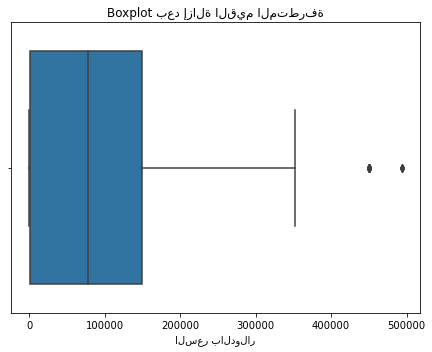

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# قبل الإزالة
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="السعر بالدولار", data=df)
plt.title("Boxplot بعد إزالة القيم المتطرفة")

plt.tight_layout()
plt.show()


تحويل عمود "تاريخ النشر" إلى datetime

In [59]:
df["تاريخ النشر"] = pd.to_datetime(df["تاريخ النشر"], dayfirst=True, errors='coerce')
df.head(20)

C:\Users\JIT\AppData\Local\Temp\ipykernel_22288\246940174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["تاريخ النشر"] = pd.to_datetime(df["تاريخ النشر"], dayfirst=True, errors='coerce')


,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,السعر بالدولار,region_encoded,services_encoded,price_scaled
0,2025-12-30,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,2025.00,60,140,-0.773305
1,2026-01-31,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,121500.00,23,117,-0.131379
2,2026-01-04,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,150000.00,86,104,0.021748
4,2025-12-15,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,119850.00,96,43,-0.140245
5,2025-11-26,NaN,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,شقة للبيع ، مساحتها ١٥٠ م٢ ، تتكون من ٤ غرف وص...,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,مراد غالب محمود ياسين,0568996646,94500.00,94,161,-0.276447
6,2025-11-21,NaN,للبيع,قطعة ارض,685 متر مربع,جنين,جبع,أ,جبع,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,غير محدد,40 - 50 دينار / متر مربع,يحيى سعد الدين,+972599231525,63.45,37,43,-0.783844
7,2025-10-26,NaN,للبيع,بيت مستقل,180 متر مربع,نابلس,الباذان,أ,قرب صالة الاوبرا,بيت مستقل موقع هادئ مسور من ثلاث جهات يوجد موق...,ماء / كهرباء / انترنت / طابو / شارع فرعي / موق...,90 الف الى 100 الف دينار / لكامل العقار,عدنان شاكر احمد,+9720597255282,133950.00,2,135,-0.064487
8,2025-10-23,NaN,للبيع,قطعة ارض,1500 متر مربع,رام الله والبيرة,مدينة البيرة,أ,رام الله بيت ريما -البيرة -بني زيد الغربية,قطع اراضي للبيع في بيت ريما تبعد نصف ساعة عن ر...,ماء / كهرباء / طابو / شارع رئيسي / أشجار مثمرة,50 الف الى 60 الف دينار / لكامل العقار,فهد علي هلال,0097366634446,77550.00,86,212,-0.367518
10,2025-10-11,NaN,للبيع,شقة,180 متر مربع,رام الله والبيرة,مدينة رام الله,NaN,الماصيون,شقة فاخرة للبيع من المالك مباشرة في رام الله –...,ماء / كهرباء / انترنت / تكييف / طابو / شارع فر...,700 الف الى 800 الف شيكل / لكامل العقار,محمد عطية,+972537314979,202500.00,91,91,0.303825
11,2025-10-07,NaN,للبيع,قطعة ارض,9150 دونم,طولكرم,كفر زيباد,ب,كفر زيباد,للبيع أرض مميزة في طولكرم – كفرزيباد المساحة: ...,ماء / كهرباء / طابو / شارع رئيسي,40 الف الى 50 الف دينار / دونم,سالي سويلم,0592426338,63450.00,77,211,-0.443275


In [60]:
# تعريف دالة تنظيف النوع
def clean_property_type(text):
    if pd.isna(text):
        return "غير محدد"

    text = text.strip().lower()

    if "شقة" in text or "شقه" in text:
        return "شقة"
    elif "رووف" in text:
        return "رووف"
    elif "فيلا" in text:
        return "فيلا"
    elif "ارض" in text or "أرض" in text:
        return "أرض"
    elif "بيت" in text and "مستقل" in text:
        return "بيت مستقل"
    elif "عمارة" in text:
        return "عمارة"
    else:
        return text

# تطبيق التوحيد
df["نوع العقار الموحد"] = df["نوع العقار"].apply(clean_property_type)

# التحقق من القيم الجديدة
print("✅ القيم الموحدة في عمود النوع:")
print(df["نوع العقار الموحد"].value_counts())


✅ القيم الموحدة في عمود النوع:
أرض          144
شقة          112
بيت مستقل     28
محل           22
مكتب          21
فيلا          13
رووف           7
مخزن           4
عمارة          1
Name: نوع العقار الموحد, dtype: int64


C:\Users\JIT\AppData\Local\Temp\ipykernel_22288\1404616277.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["نوع العقار الموحد"] = df["نوع العقار"].apply(clean_property_type)


توحيد المساحة

In [61]:
import numpy as np
import re

def extract_area_in_m2(area_text):
    if pd.isna(area_text):
        return np.nan

    text = area_text.lower()
    text = text.replace("متر مربع", "م")
    text = text.replace("متر", "م")
    text = text.replace("م²", "م")
    text = text.replace("م.", "م")
    text = text.replace("م ", "م")
    text = text.replace("مت", "م")  # تصحيحات محتملة

    # التعامل مع دونم
    if "دونم" in text:
        match = re.search(r'([\d.,]+)', text)
        if match:
            value = match.group(1).replace(',', '.')
            return float(value) * 1000  # دونم = 1000 متر مربع
        else:
            return np.nan

    # التعامل مع متر
    elif "م" in text:
        match = re.search(r'([\d.,]+)', text)
        if match:
            value = match.group(1).replace(',', '.')
            return float(value)
        else:
            return np.nan

    # إذا لم تُذكر الوحدة
    else:
        match = re.search(r'([\d.,]+)', text)
        if match:
            value = match.group(1).replace(',', '.')
            return float(value)
        else:
            return np.nan

# تطبيق على العمود
df["المساحة_متر2"] = df["المساحة"].apply(extract_area_in_m2)

# عرض النتائج
print(df[["المساحة", "المساحة_متر2"]].drop_duplicates().head(10))


          المساحة  المساحة_متر2
0    120 متر مربع         120.0
1    153 متر مربع         153.0
2     45 متر مربع          45.0
4    560 متر مربع         560.0
5    150 متر مربع         150.0
6    685 متر مربع         685.0
7    180 متر مربع         180.0
8   1500 متر مربع        1500.0
11      9150 دونم     9150000.0
13    55 متر مربع          55.0


C:\Users\JIT\AppData\Local\Temp\ipykernel_22288\3984860314.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["المساحة_متر2"] = df["المساحة"].apply(extract_area_in_m2)


In [62]:
df.head(20)

,تاريخ النشر,ملاحظة الإعلان,العرض,نوع العقار,المساحة,المدينة,المنطقة,تصنيف المنطقة,العنوان,تفاصيل,الخدمات والمميزات,السعر التقريبي,اسم المعلن,هاتف المعلن,السعر بالدولار,region_encoded,services_encoded,price_scaled,نوع العقار الموحد,المساحة_متر2
0,2025-12-30,NaN,للايجار,شقة,120 متر مربع,القدس,شعفاط,أ,شعفاط,هل تبحث عن شقة في محافظة القدس؟ للايجار شقة 12...,ماء / كهرباء / تدفئة / أرنونا / موقف للسيارة /...,5 الاف الى 10 الاف شيكل / شهرياً,طارق اسماعيل,0546432978,2025.00,60,140,-0.773305,شقة,120.0
1,2026-01-31,NaN,للبيع,شقة,153 متر مربع,بيت لحم,بيت جالا,أ,بيت جالا - حارة الجورية,شقة للبيع – بيت جالا / شارع فلسطين شقة الطابق ...,ماء / كهرباء / انترنت / طابو / شارع رئيسي / شا...,400 الف الى 500 الف شيكل / متر مربع,Issam Maali,0597653656,121500.00,23,117,-0.131379,شقة,153.0
2,2026-01-04,NaN,للبيع,محل,45 متر مربع,رام الله والبيرة,مدينة البيرة,أ,محل تجاري للبيع بالخلو,محل تجاري للبيع بالخلو محل تجاري في موقع متميز...,ماء / كهرباء / انترنت / شارع رئيسي / موقف للسي...,100 الف الى 200 الف دولار / لكامل العقار,ابو ليث,0598931495,150000.00,86,104,0.021748,محل,45.0
4,2025-12-15,NaN,للبيع,قطعة ارض,560 متر مربع,نابلس,مدينة نابلس,أ,نابلس الجديدة,للبيع: أرض مميزة في نابلس الجديدة – نابلس المس...,غير محدد,80 الف الى 90 الف دينار / متر مربع,AMJAD JABR,+970594333572,119850.00,96,43,-0.140245,أرض,560.0
5,2025-11-26,NaN,للبيع,شقة,150 متر مربع,طولكرم,مدينة طولكرم,أ,شارع دوار السلام - قرب فواز مول,شقة للبيع ، مساحتها ١٥٠ م٢ ، تتكون من ٤ غرف وص...,ماء / كهرباء / تكييف / طابو / شارع رئيسي / موق...,300 الف الى 400 الف شيكل / متر مربع,مراد غالب محمود ياسين,0568996646,94500.00,94,161,-0.276447,شقة,150.0
6,2025-11-21,NaN,للبيع,قطعة ارض,685 متر مربع,جنين,جبع,أ,جبع,هل تبحث عن قطعة ارض في محافظة جنين؟ للبيع قطعة...,غير محدد,40 - 50 دينار / متر مربع,يحيى سعد الدين,+972599231525,63.45,37,43,-0.783844,أرض,685.0
7,2025-10-26,NaN,للبيع,بيت مستقل,180 متر مربع,نابلس,الباذان,أ,قرب صالة الاوبرا,بيت مستقل موقع هادئ مسور من ثلاث جهات يوجد موق...,ماء / كهرباء / انترنت / طابو / شارع فرعي / موق...,90 الف الى 100 الف دينار / لكامل العقار,عدنان شاكر احمد,+9720597255282,133950.00,2,135,-0.064487,بيت مستقل,180.0
8,2025-10-23,NaN,للبيع,قطعة ارض,1500 متر مربع,رام الله والبيرة,مدينة البيرة,أ,رام الله بيت ريما -البيرة -بني زيد الغربية,قطع اراضي للبيع في بيت ريما تبعد نصف ساعة عن ر...,ماء / كهرباء / طابو / شارع رئيسي / أشجار مثمرة,50 الف الى 60 الف دينار / لكامل العقار,فهد علي هلال,0097366634446,77550.00,86,212,-0.367518,أرض,1500.0
10,2025-10-11,NaN,للبيع,شقة,180 متر مربع,رام الله والبيرة,مدينة رام الله,NaN,الماصيون,شقة فاخرة للبيع من المالك مباشرة في رام الله –...,ماء / كهرباء / انترنت / تكييف / طابو / شارع فر...,700 الف الى 800 الف شيكل / لكامل العقار,محمد عطية,+972537314979,202500.00,91,91,0.303825,شقة,180.0
11,2025-10-07,NaN,للبيع,قطعة ارض,9150 دونم,طولكرم,كفر زيباد,ب,كفر زيباد,للبيع أرض مميزة في طولكرم – كفرزيباد المساحة: ...,ماء / كهرباء / طابو / شارع رئيسي,40 الف الى 50 الف دينار / دونم,سالي سويلم,0592426338,63450.00,77,211,-0.443275,أرض,9150000.0
